In [1]:
# Add the Matplotlib inlinemagic command
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Files to load
city_data_to_load = os.path.join("Resources","city_data.csv")
ride_data_to_load = os.path.join("Resources","ride_data.csv")

In [3]:
#Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the data types of each columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [9]:
#Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
#Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#Display the DataFrame
pyber_data_df.head()                                                

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# Create the a DataFrame for each type of city.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [13]:
# Create the ride count for each type of city.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [14]:
# Get average fare for each type of city.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [15]:
# Get average number of drivers for each type of city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

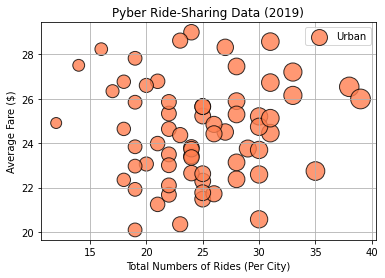

In [16]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s = 10 * urban_ride_count, c="coral",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

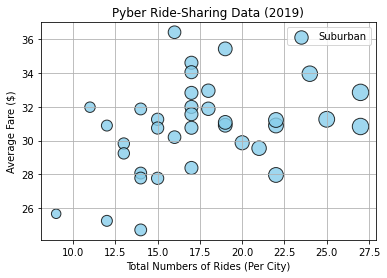

In [17]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s = 10 * suburban_ride_count, c="skyblue",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

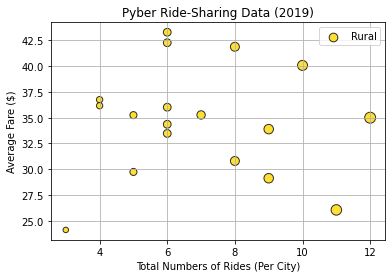

In [18]:
# Build the scatter plots for suburban cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s = 10 * rural_ride_count, c="gold",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Rural")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Numbers of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

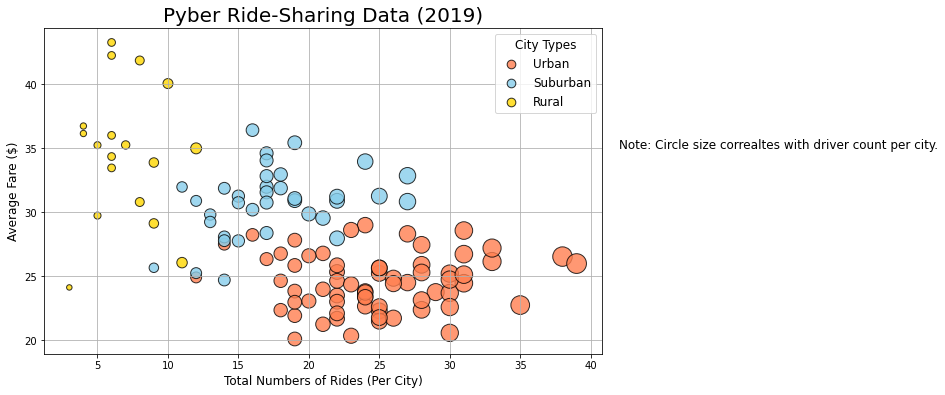

In [19]:
# Build the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s = 10 * urban_ride_count, c="coral",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s = 10 * suburban_ride_count, c="skyblue",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s = 10 * rural_ride_count, c="gold",
           edgecolor = "black", linewidths=1,
           alpha = 0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Numbers of Rides (Per City)",fontsize=12)
plt.grid(True)

#Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes =[75]
lgnd.legendHandles[1]._sizes =[75]
lgnd.legendHandles[2]._sizes =[75]
lgnd.get_title().set_fontsize(12)

#Incorporate a text label about circle size.
plt.text(42,35, "Note: Circle size correaltes with driver count per city.", fontsize="12")

#Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()


In [20]:
# Get the summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [21]:
# Get the summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [22]:
# Calculate the mean of the ride for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [23]:
# Calculate the median of the ride for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [24]:
# Calculate the mode of the ride for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [25]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [26]:
# Calculate the measures of central tendncy for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [27]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [28]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is {mean_urban_fares:.2f}")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is {median_urban_fares:.2f}")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}")

The mean fare price for urban trips is 24.53
The median fare price for urban trips is 24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [29]:
# Get the drive count for the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [30]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean count for urban drivers is {mean_urban_drivers:.2f}")
median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is {median_urban_drivers:.2f}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}")

The mean count for urban drivers is 36.68
The median fare price for urban trips is 37.00
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86]))


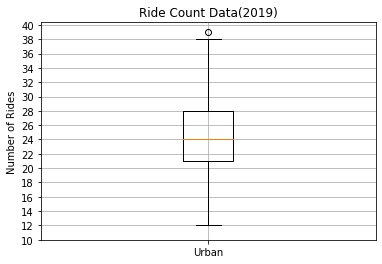

In [31]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()


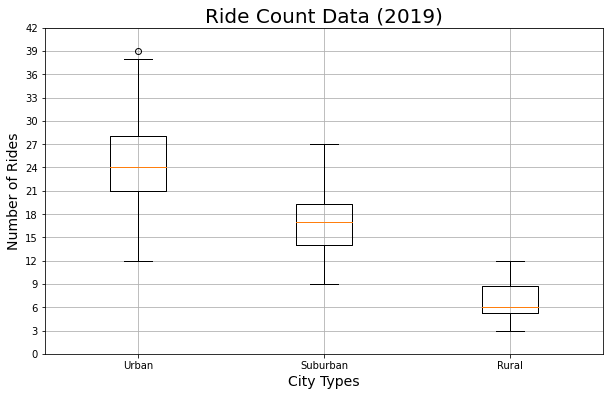

In [32]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title('Ride Count Data (2019)', fontsize = 20 )
ax.set_ylabel('Number of Rides', fontsize = 14 )
ax.set_xlabel('City Types', fontsize = 14 )
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()


In [33]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


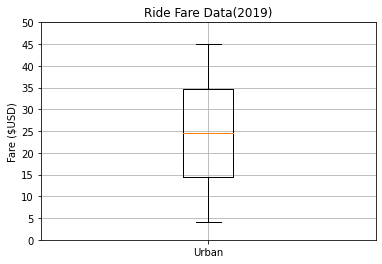

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [34]:
# Create a box-and-whisker plot for the urban city average fare.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


In [35]:
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

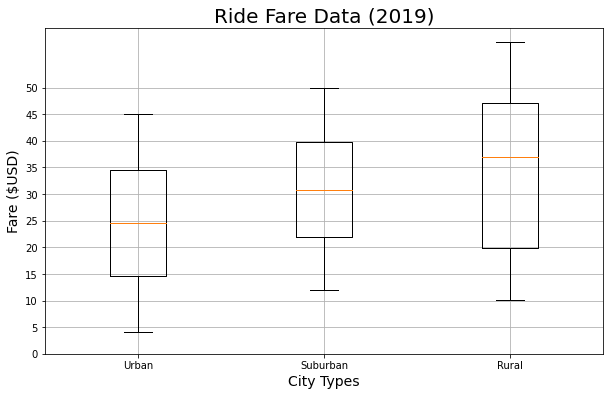

In [36]:
# Add all ride count box-and-whisker plots to the same graph (Ride Fare Data)
x_labels = ["Urban","Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize = 20 )
ax.set_ylabel('Fare ($USD)', fontsize = 14 )
ax.set_xlabel('City Types', fontsize = 14 )
ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()


In [37]:
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

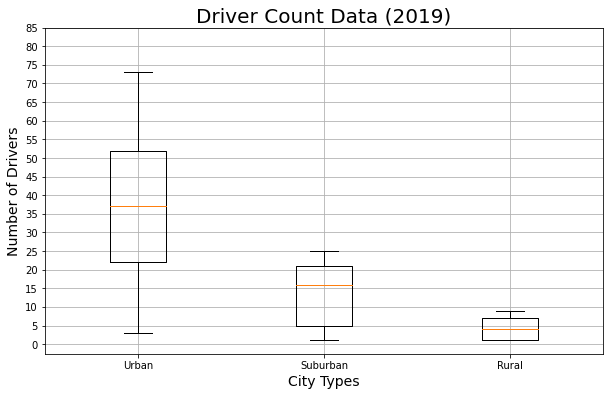

In [38]:
# Add all ride count box-and-whisker plots to the same graph (Driver count)
x_labels = ["Urban","Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize =(10,6))
ax.set_title('Driver Count Data (2019)', fontsize = 20 )
ax.set_ylabel('Number of Drivers', fontsize = 14 )
ax.set_xlabel('City Types', fontsize = 14 )
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()